In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/dilshan/Documents/AI_ML_Course(zuu)/week03/zuu_crew_scores.csv')

In [3]:
X = df.drop(columns=["MemberName", "CourseName", "CapstoneScore"])
y = df["CapstoneScore"].values.reshape(-1, 1)

# X will include string values. when trying to scale or do multiplications numpy will throw an error.


In [4]:
print("Features used:", X.columns.tolist())

Features used: ['EducationLevel', 'Attendance', 'TotalHours', 'AssignmentsCompleted', 'HackathonParticipation', 'GitHubScore', 'PeerReviewScore']


In [5]:
# 2. Feature Scaling (Standardization)
class StandardScalerCustom:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        return self
    
    def transform(self, X):
        return (X - self.mean_) / self.std_
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)

scaler = StandardScalerCustom()
X_scaled = scaler.fit_transform(X.values)

In [6]:
# Train-test split (manual)
def train_test_split_custom(X, y, test_size=0.2, seed=42):
    np.random.seed(seed)
    m = X.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    test_size = int(m * test_size)
    test_idx = indices[:test_size]
    train_idx = indices[test_size:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_custom(X_scaled, y)

In [7]:
# 3. Linear Regression (Gradient Descent)
class LinearRegressionGD:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros((n+1, 1))  # weights + bias
        X_b = np.c_[np.ones((m,1)), X]   # add bias column
        
        self.cost_history = []
        for _ in range(self.epochs):
            gradients = (1/m) * X_b.T.dot(X_b.dot(self.theta) - y)
            self.theta -= self.lr * gradients
            cost = (1/(2*m)) * np.sum((X_b.dot(self.theta) - y)**2)
            self.cost_history.append(cost)
        return self
    
    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m,1)), X]
        return X_b.dot(self.theta)

In [8]:
X.shape

(150, 7)

In [9]:
#4. Evaluation Metrics
def r2_score_custom(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot

In [10]:
# 5. Polynomial Feature Expansion
def polynomial_features(X, degree):
    m, n = X.shape
    features = [np.ones(m)]  # bias term
    for deg in range(1, degree+1):
        for combo in combinations_with_replacement(range(n), deg):
            new_feature = np.prod(X[:, combo], axis=1)
            features.append(new_feature)
    return np.vstack(features).T  # shape (m, num_features)

Custom GD Linear R² (train): 0.4515533297236244
Custom GD Linear R² (test): 0.24600807534221014


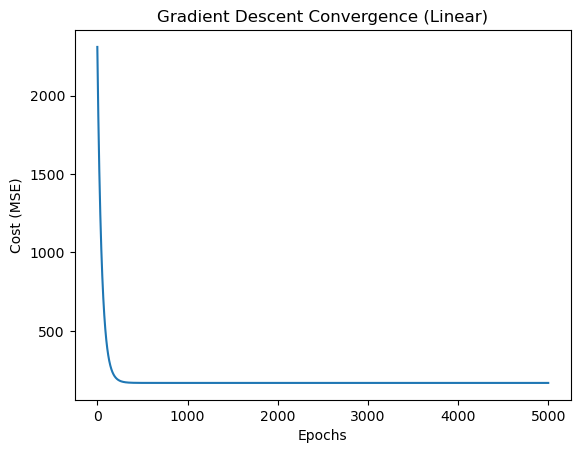

In [11]:
# 6. Train Linear Regression

lin_gd = LinearRegressionGD(lr=0.01, epochs=5000)
lin_gd.fit(X_train, y_train)

y_pred_train = lin_gd.predict(X_train)
y_pred_test = lin_gd.predict(X_test)

print("Custom GD Linear R² (train):", r2_score_custom(y_train, y_pred_train))
print("Custom GD Linear R² (test):", r2_score_custom(y_test, y_pred_test))

plt.plot(lin_gd.cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence (Linear)")
plt.show()

In [12]:
# 7. Polynomial Regression (degree=2 example)
from itertools import combinations_with_replacement

degree = 2
X_poly = polynomial_features(X_scaled, degree)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split_custom(X_poly, y)

poly_gd = LinearRegressionGD(lr=0.01, epochs=3000)
poly_gd.fit(X_train_p, y_train_p)

y_pred_poly = poly_gd.predict(X_test_p)
print(f"Polynomial Regression (deg={degree}) R² (test):", r2_score_custom(y_test_p, y_pred_poly))


Polynomial Regression (deg=2) R² (test): 0.09977844258876001


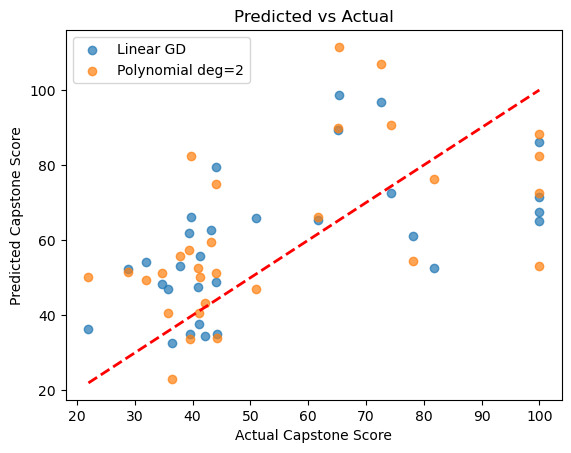

In [13]:

# 8. Predicted vs Actual Plot

plt.scatter(y_test, y_pred_test, label="Linear GD", alpha=0.7)
plt.scatter(y_test_p, y_pred_poly, label=f"Polynomial deg={degree}", alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)
plt.xlabel("Actual Capstone Score")
plt.ylabel("Predicted Capstone Score")
plt.legend()
plt.title("Predicted vs Actual")
plt.show()